In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Loan Prediction Dataset.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Preprocessing 

In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# missing values in for numerical term - mean

data['LoanAmount'] = data['LoanAmount'].fillna(data.LoanAmount.mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data.Loan_Amount_Term.mean())
data['Credit_History'] = data['Credit_History'].fillna(data.Credit_History.mean())

In [7]:
data.Gender.mode()   # mode gives a result in a form of dataframe

0    Male
Name: Gender, dtype: object

In [8]:
# missing values for categorical term - mode

data['Gender'] = data['Gender'].fillna(data.Gender.mode()[0])
data['Married'] = data['Married'].fillna(data.Married.mode()[0])
data['Dependents'] = data['Dependents'].fillna(data.Dependents.mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data.Self_Employed.mode()[0])

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

### Categorical

<Axes: xlabel='count', ylabel='Gender'>

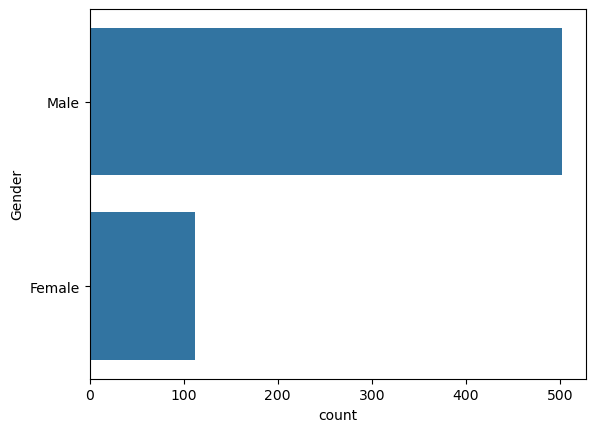

In [10]:
sns.countplot(data.Gender,saturation=0.75)

<Axes: xlabel='count', ylabel='Dependents'>

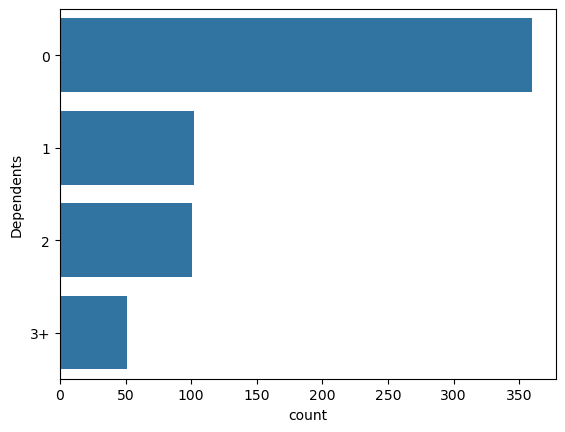

In [11]:
sns.countplot(data.Dependents)

<Axes: xlabel='count', ylabel='Education'>

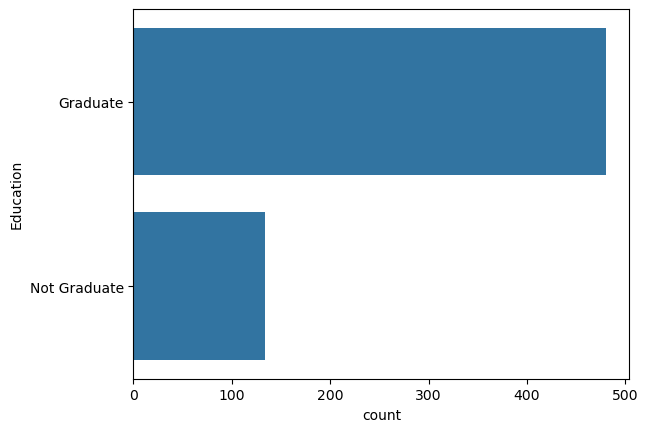

In [12]:
sns.countplot(data.Education)

<Axes: xlabel='count', ylabel='Self_Employed'>

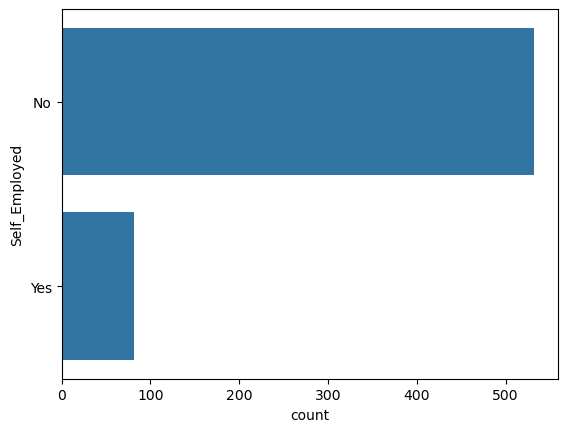

In [13]:
sns.countplot(data.Self_Employed)

<Axes: xlabel='count', ylabel='Property_Area'>

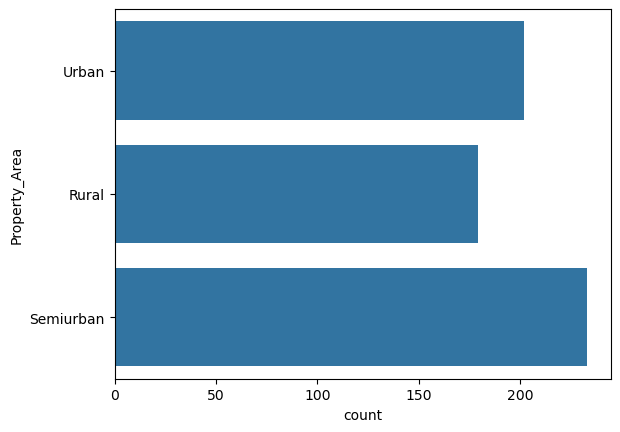

In [14]:
sns.countplot(data.Property_Area)

<Axes: xlabel='count', ylabel='Loan_Status'>

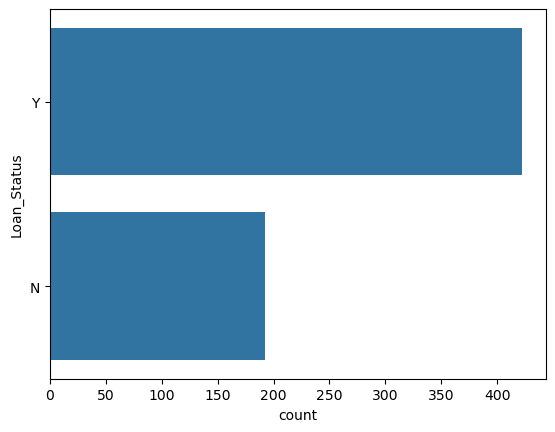

In [15]:
sns.countplot(data.Loan_Status)

In [16]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Creation new Attribute

In [17]:
data['Total_income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [18]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


C:\Users\kpaps\AppData\Local\Temp\ipykernel_8616\3202739375.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.ApplicantIncome_log)


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

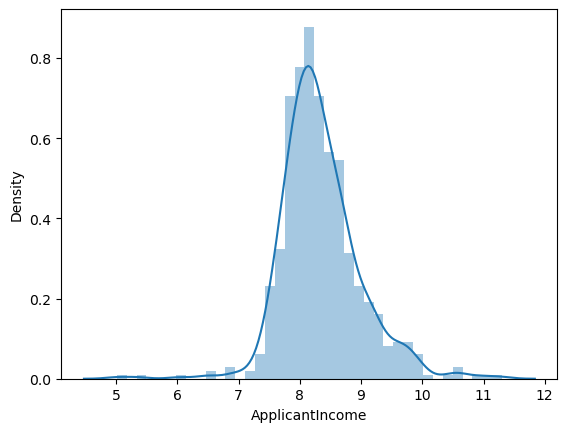

In [52]:
data['ApplicantIncome_log'] = np.log(data.ApplicantIncome)
sns.distplot(data.ApplicantIncome_log)

In [53]:
data['CoapplicantIncome_log'] = np.log(data.CoapplicantIncome)

C:\Users\kpaps\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


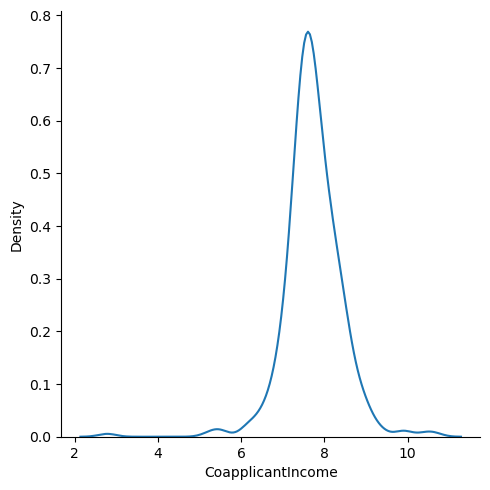

In [33]:
sns.displot(data.CoapplicantIncome_log,kind='kde')

C:\Users\kpaps\AppData\Local\Temp\ipykernel_8616\1836393364.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.LoanAmount_log)


<Axes: xlabel='LoanAmount', ylabel='Density'>

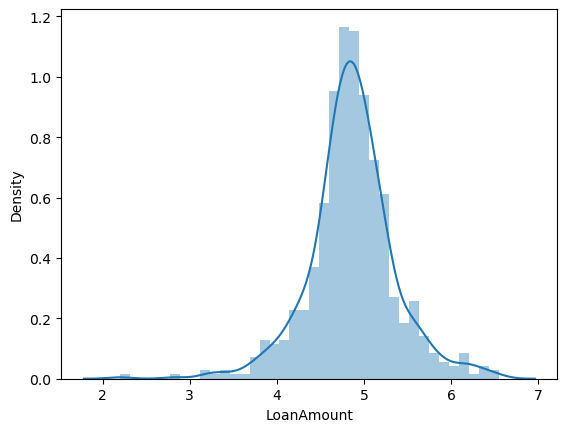

In [54]:
data['LoanAmount_log'] = np.log(data.LoanAmount)
sns.distplot(data.LoanAmount_log)

C:\Users\kpaps\AppData\Local\Temp\ipykernel_8616\4076620435.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Loan_Amount_Term_log)


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

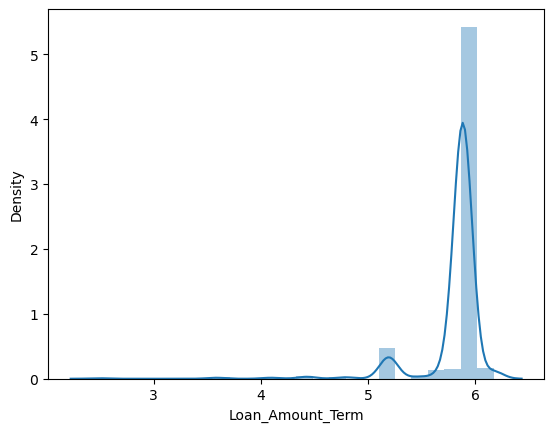

In [55]:
data['Loan_Amount_Term_log'] = np.log(data.Loan_Amount_Term)
sns.distplot(data.Loan_Amount_Term_log)

C:\Users\kpaps\AppData\Local\Temp\ipykernel_8616\3852639392.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Total_income_log)


<Axes: xlabel='Total_income', ylabel='Density'>

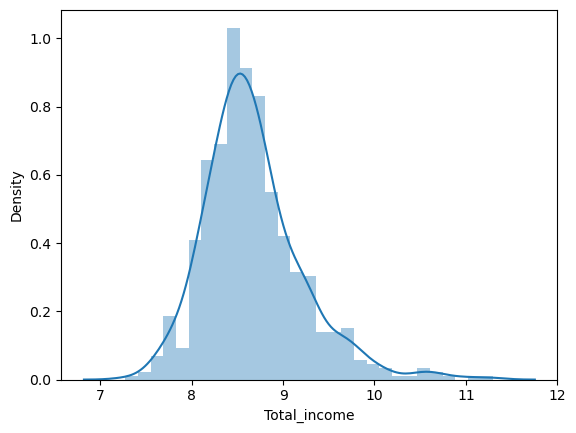

In [57]:
data['Total_income_log'] = np.log(data.Total_income)
sns.distplot(data.Total_income_log)

In [58]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0,7.972466,-inf,4.262680,5.886104,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0,8.320205,-inf,3.688879,5.192957,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0,8.996157,5.480639,5.533389,5.886104,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0,8.933664,-inf,5.231109,5.886104,8.933664


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                614 non-null    object 
 1   Gender                 614 non-null    object 
 2   Married                614 non-null    object 
 3   Dependents             614 non-null    object 
 4   Education              614 non-null    object 
 5   Self_Employed          614 non-null    object 
 6   ApplicantIncome        614 non-null    int64  
 7   CoapplicantIncome      614 non-null    float64
 8   LoanAmount             614 non-null    float64
 9   Loan_Amount_Term       614 non-null    float64
 10  Credit_History         614 non-null    float64
 11  Property_Area          614 non-null    object 
 12  Loan_Status            614 non-null    object 
 13  Total_income           614 non-null    float64
 14  ApplicantIncome_log    614 non-null    float64
 15  Coappl

### correlation Matrix

<Axes: >

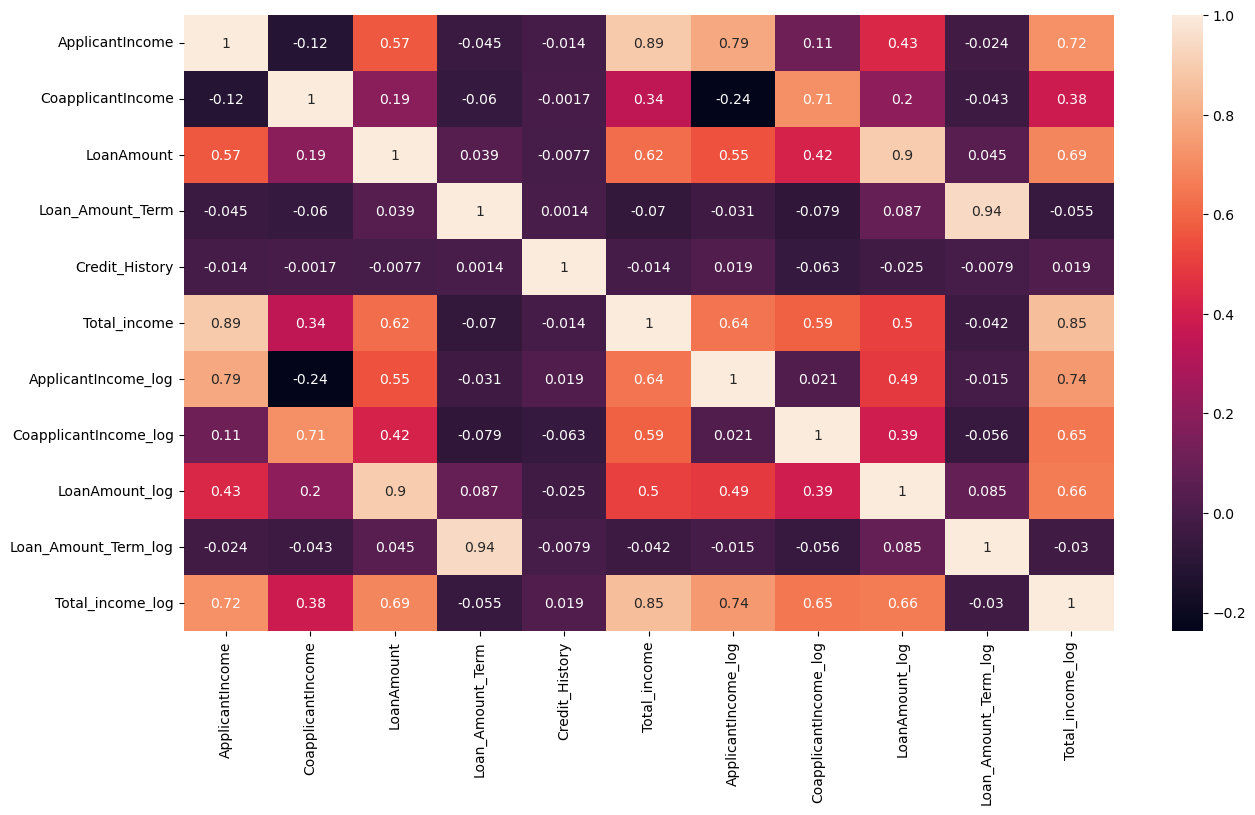

In [63]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

In [64]:
# Drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_income','Loan_ID','CoapplicantIncome_log']
data = data.drop(columns=cols,axis=1)

In [65]:
data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y,7.972466,4.262680,5.886104,7.972466
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y,8.320205,3.688879,5.192957,8.320205
611,Male,Yes,1,Graduate,No,1.0,Urban,Y,8.996157,5.533389,5.886104,9.025456
612,Male,Yes,2,Graduate,No,1.0,Urban,Y,8.933664,5.231109,5.886104,8.933664


In [66]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncome_log',
       'LoanAmount_log', 'Loan_Amount_Term_log', 'Total_income_log'],
      dtype='object')

## Label Encoding

In [75]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])

In [76]:
data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_income_log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,7.972466,4.262680,5.886104,7.972466
610,1,1,3,0,0,1.0,0,1,8.320205,3.688879,5.192957,8.320205
611,1,1,1,0,0,1.0,2,1,8.996157,5.533389,5.886104,9.025456
612,1,1,2,0,0,1.0,2,1,8.933664,5.231109,5.886104,8.933664


## Train-Test Split

In [77]:
X = data.drop(columns = ['Loan_Status'],axis=1)
Y = data['Loan_Status']

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

## Model Training

In [79]:
from sklearn.model_selection import cross_val_score
def classify(model, X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy is', model.score(x_test,y_test)*100)
    # cross validation - It is used for better validation of model
    # eg: cv-5 train-4, test-1
    score = cross_val_score(model,X,Y,cv=5)
    print('Cross_validation_is',np.mean(score)*100)

In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,Y)

Accuracy is 77.27272727272727
Cross_validation_is 80.9462881514061


In [82]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,Y)

Accuracy is 72.72727272727273
Cross_validation_is 71.17552978808476


In [83]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,Y)

Accuracy is 77.27272727272727
Cross_validation_is 78.82980141276823


In [84]:
model = ExtraTreesClassifier()
classify(model,X,Y)

Accuracy is 73.37662337662337
Cross_validation_is 76.7173130747701


## Hyperparameter Tuning

In [85]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
classify(model,X,Y)

Accuracy is 76.62337662337663
Cross_validation_is 79.64280954284953


### Confusion Matrix

In [86]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[20, 34],
       [ 2, 98]], dtype=int64)

<Axes: >

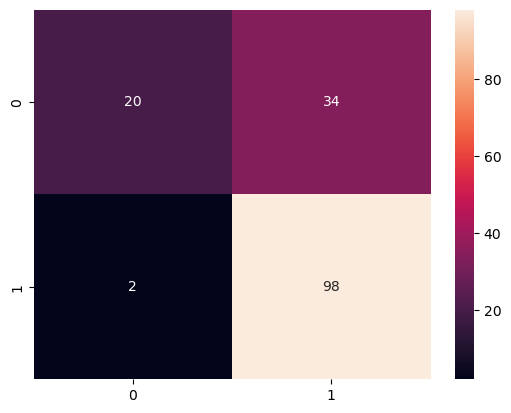

In [87]:
sns.heatmap(cm,annot=True)